In [1]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('dark_background')

C:\Users\Aakash\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Aakash\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Aakash\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Aakash\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: P

In [2]:
#Importing dataset
data=pd.read_csv("C:\\Users\\Aakash\\Desktop\\loan\\train.csv")
df=pd.DataFrame(data)
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [3]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
df['Dependents'].describe()

count     599
unique      4
top         0
freq      345
Name: Dependents, dtype: object

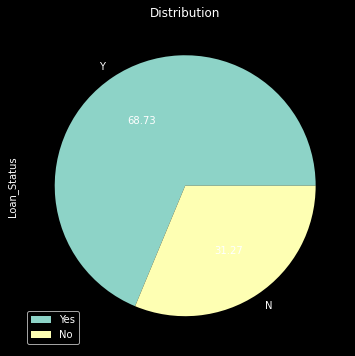

In [5]:
#Comparing the distribution of the 2 classes, we can see heavy imbalance
df['Loan_Status'].value_counts(normalize='true')
df['Loan_Status'].value_counts().plot(kind='pie',figsize=(6,6),autopct='%.2f')
plt.title('Distribution')
plt.legend(["Yes","No"])

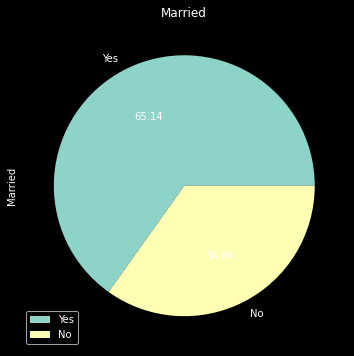

In [6]:

df['Married'].value_counts().plot(kind='pie',figsize=(6,6),autopct='%.2f')
plt.title('Married')
plt.legend(["Yes","No"])

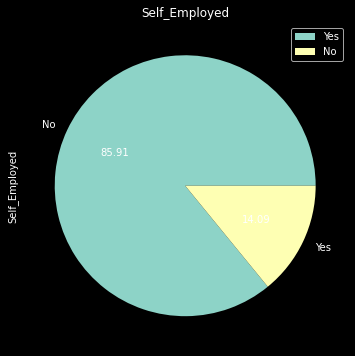

In [7]:
df['Self_Employed'].value_counts().plot(kind='pie',figsize=(6,6),autopct='%.2f')
plt.title('Self_Employed')
plt.legend(["Yes","No"])

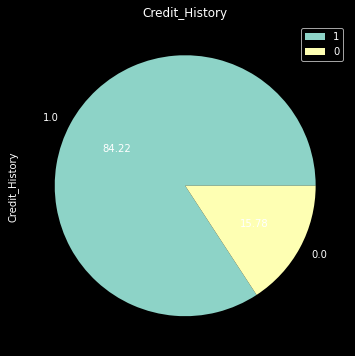

In [8]:
df['Credit_History'].value_counts().plot(kind='pie',figsize=(6,6),autopct='%.2f')
plt.title('Credit_History')
plt.legend(["1","0"])

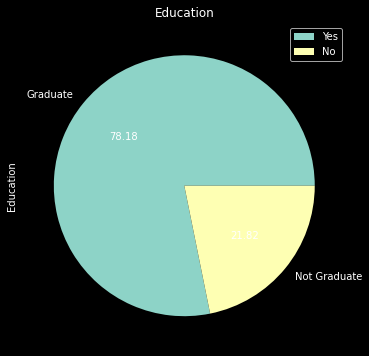

In [9]:
df['Education'].value_counts().plot(kind='pie',figsize=(6,6),autopct='%.2f')
plt.title('Education')
plt.legend(["Yes","No"])

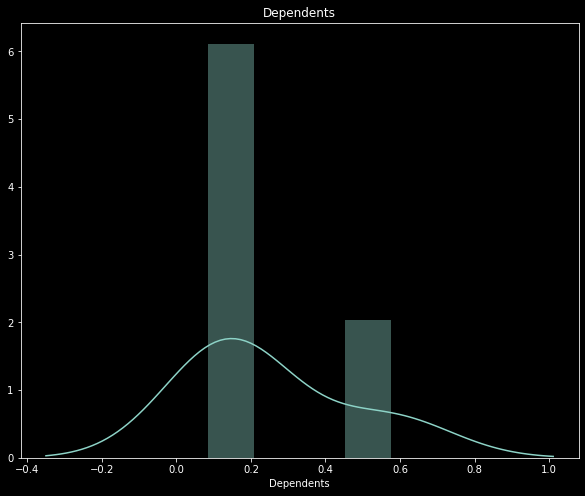

In [10]:

plt.figure(figsize=(10,8))
plt.title("Dependents")
sns.distplot(df["Dependents"].value_counts(normalize=True))

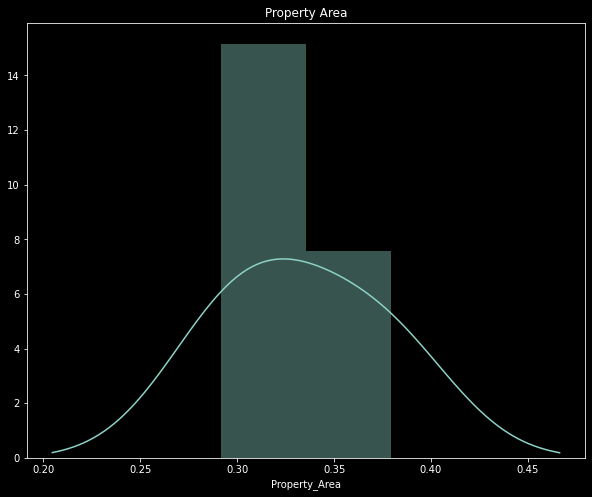

In [11]:

plt.figure(figsize=(10,8))
plt.title("Property Area")
sns.distplot(df["Property_Area"].value_counts(normalize=True))

In [12]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


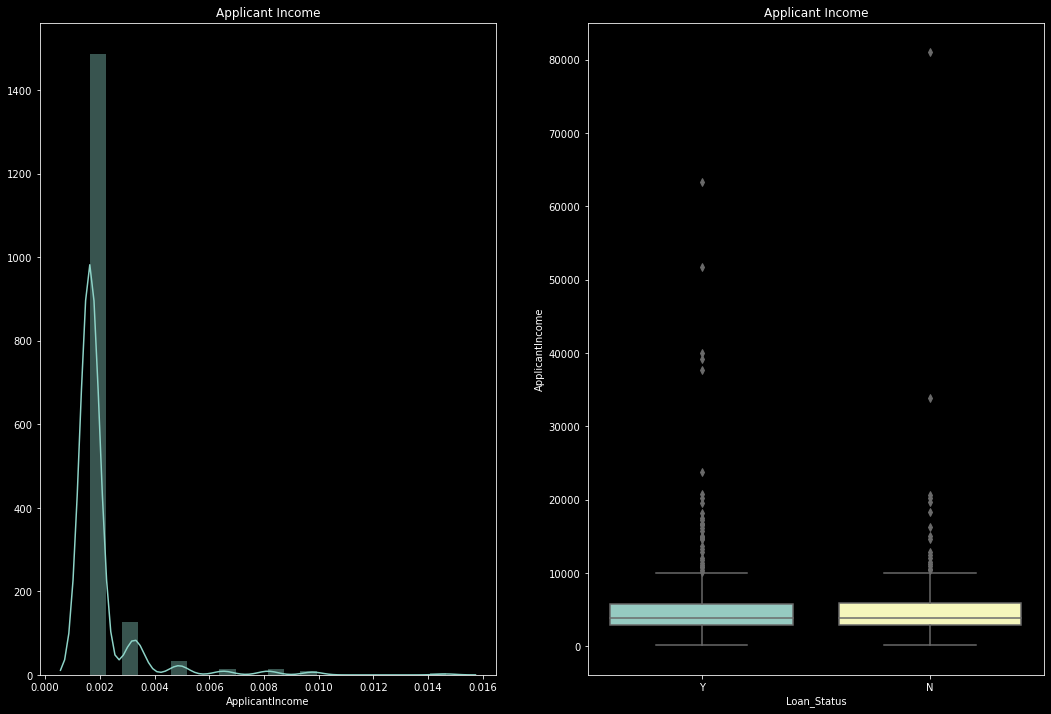

In [13]:
fig,axs=plt.subplots(ncols=2,figsize=(18,12))

axs[0].set_title("Applicant Income")
axs[1].set_title("Applicant Income")
sns.distplot(df["ApplicantIncome"].value_counts(normalize=True),ax=axs[0])
sns.boxplot(x='Loan_Status', y='ApplicantIncome',data = df,ax=axs[1])
#sns.boxplot(df["ApplicantIncome"].value_counts(normalize=True),ax=axs[1])

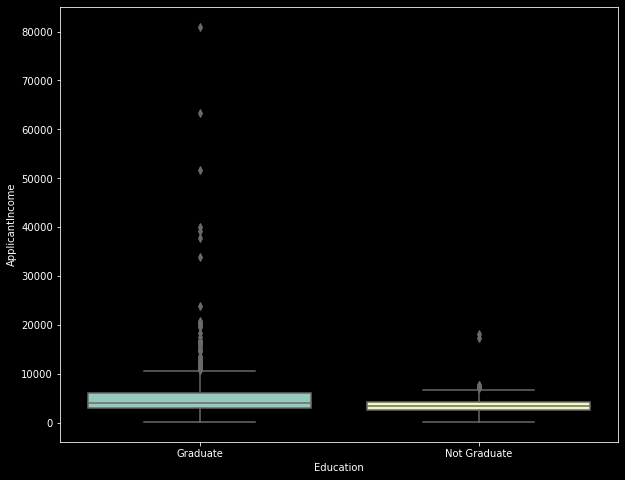

In [14]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Education', y='ApplicantIncome',data = df)

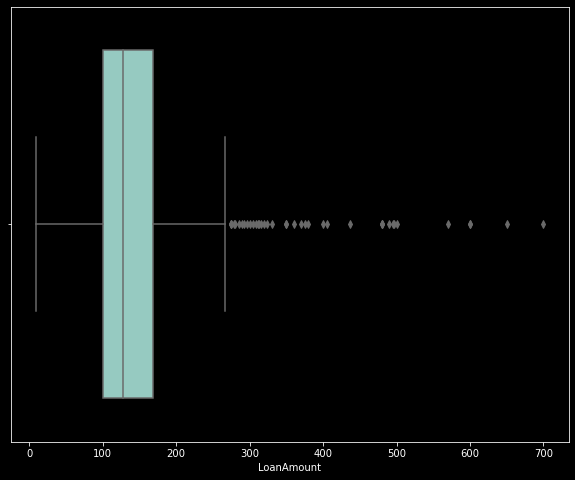

In [15]:
plt.figure(figsize=(10,8))
sns.boxplot(df['LoanAmount'])

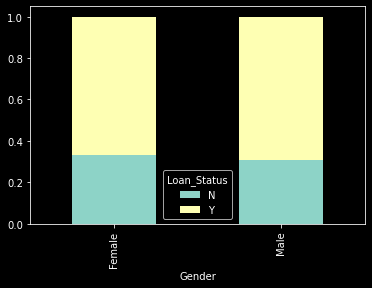

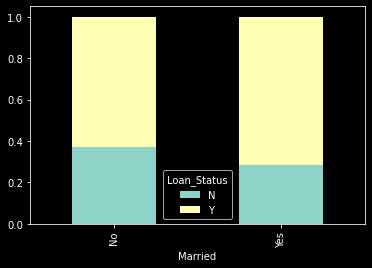

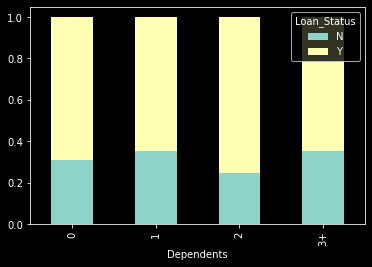

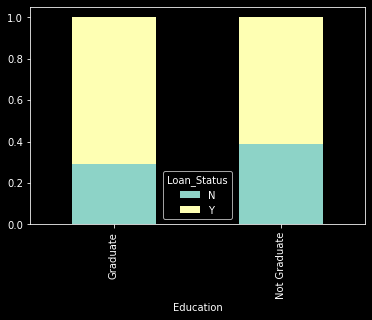

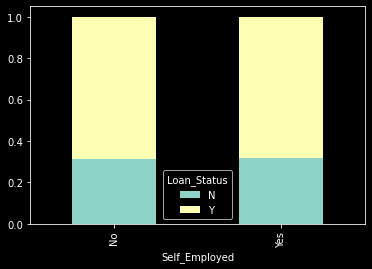

In [16]:
Gender=pd.crosstab(df['Gender'],df['Loan_Status'])
Gender.div(Gender.sum(1),axis=0).plot(kind='bar',stacked=True)
Married=pd.crosstab(df['Married'],df['Loan_Status'])
Dependents=pd.crosstab(df['Dependents'],df['Loan_Status'])
Education=pd.crosstab(df['Education'],df['Loan_Status'])
Self_Employed=pd.crosstab(df['Self_Employed'],df['Loan_Status'])
Married.div(Married.sum(1),axis=0).plot(kind='bar',stacked=True)
Dependents.div(Dependents.sum(1),axis=0).plot(kind='bar',stacked=True)
Education.div(Education.sum(1),axis=0).plot(kind='bar',stacked=True)
Self_Employed.div(Self_Employed.sum(1),axis=0).plot(kind='bar',stacked=True)

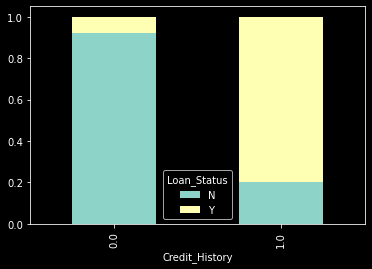

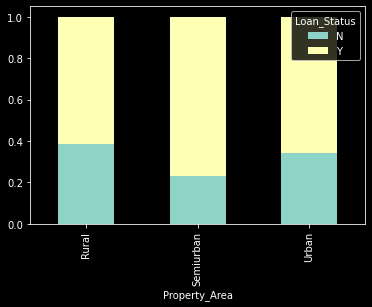

In [17]:
Credit_History=pd.crosstab(df['Credit_History'],df['Loan_Status'])
Property_Area=pd.crosstab(df['Property_Area'],df['Loan_Status'])
Credit_History.div(Credit_History.sum(1),axis=0).plot(kind='bar',stacked=True)
Property_Area.div(Property_Area.sum(1),axis=0).plot(kind='bar',stacked=True)

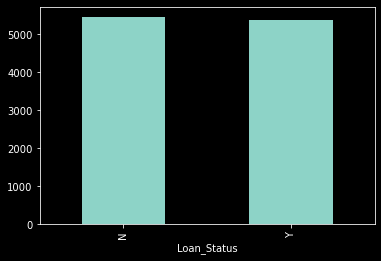

In [18]:
df.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

In [19]:
df.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [20]:
#test data
data2=pd.read_csv("C:\\Users\\Aakash\\Desktop\\loan\\test.csv")
df1=pd.DataFrame(data2)
df1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [21]:
df['Dependents'].replace('3+','3',inplace=True)
df1['Dependents'].replace('3+','3',inplace=True)
df['Loan_Status'].replace('Y','1',inplace=True)
df['Loan_Status'].replace('N','0',inplace=True)


In [22]:
for i in df['Loan_Status']:
    i=int(i)

In [23]:
df['Loan_Status']=df['Loan_Status'].astype(int)

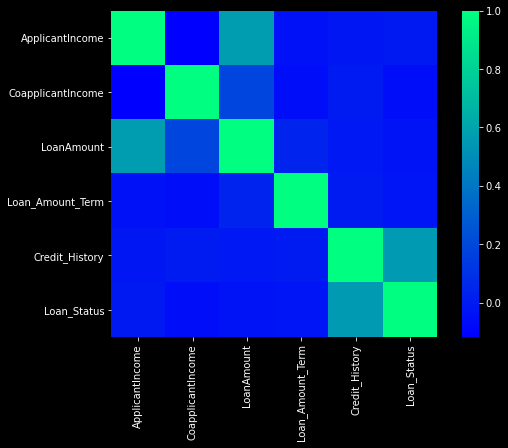

In [24]:
matrix=df.corr()
f,ax=plt.subplots(figsize=(9,6))
sns.heatmap(matrix,cmap='winter',square=True)

In [25]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [26]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df1['Gender'].fillna(df1['Gender'].mode()[0],inplace=True)
df1['Married'].fillna(df1['Married'].mode()[0],inplace=True)
df1['Dependents'].fillna(df1['Dependents'].mode()[0],inplace=True)
df1['Self_Employed'].fillna(df1['Self_Employed'].mode()[0],inplace=True)
df1['Credit_History'].fillna(df1['Credit_History'].mode()[0],inplace=True)

In [27]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)
df1['Loan_Amount_Term'].fillna(df1['Loan_Amount_Term'].mode()[0],inplace=True)
df1['LoanAmount'].fillna(df1['LoanAmount'].median(),inplace=True)

In [28]:
df1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

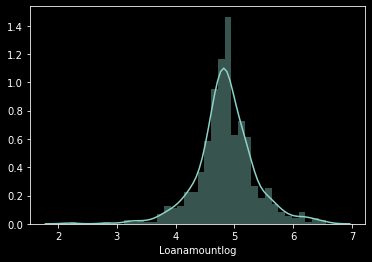

In [29]:
df['Loanamountlog']=np.log(df['LoanAmount'])
sns.distplot(df['Loanamountlog'])

In [30]:
df=df.drop('Loanamountlog',axis=1)

In [31]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


In [32]:
#Removal of ouliers, only extreme ones

Q3 = np.percentile(df['LoanAmount'], 75)
Q1=np.percentile(df['LoanAmount'],25)

cutoff=5

#Interquartile range
IQR=Q3-Q1

L=Q1-(IQR*cutoff)
U=Q3+(IQR*cutoff)
print(L)

print(U)

outliers_all=df[(df['LoanAmount']<L)|(df['LoanAmount']>U)]['LoanAmount']
outliers_yes=df[(df['Loan_Status']==1)&((df['LoanAmount']<L)|(df['LoanAmount']>U))]['LoanAmount']

outliers_no=df[(df['Loan_Status']==0)&((df['LoanAmount']<L)|(df['LoanAmount']>U))]['LoanAmount']

print("Total Outliers:",outliers_all.count())
print("yes Outliers:",outliers_yes.count())
print("no Outliers:",outliers_no.count())

-222.25
487.25
Total Outliers: 9
yes Outliers: 6
no Outliers: 3


In [33]:
df=df.drop('Loan_ID',axis=1)
df1=df1.drop('Loan_ID',axis=1)


In [34]:
X=df.drop('Loan_Status',1)
y=df['Loan_Status']

In [35]:
df=pd.get_dummies(X)


In [36]:
X=pd.get_dummies(X)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score
from sklearn.naive_bayes import GaussianNB
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)

In [39]:
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

X_train -  (429, 20)
y_train -  (429,)
X_test -  (185, 20)
y_test -  (185,)


In [40]:
#Logistic on imbalanced

In [41]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1


In [42]:
LR=LogisticRegression(max_iter=1000)
LR.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [43]:
from sklearn import metrics
y_pred=LR.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.43      0.59        51
           1       0.82      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.87      0.71      0.74       185
weighted avg       0.85      0.83      0.81       185



In [44]:
accuracy_score(y_test,y_pred)

0.8324324324324325

In [45]:
f1_score(y_test,y_pred)

0.8949152542372881

Text(0.5, 15.0, 'Predicted')

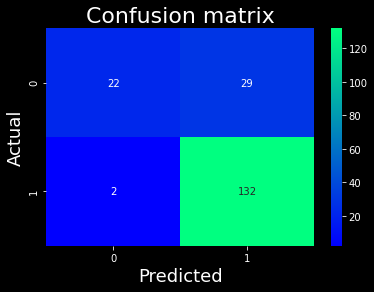

In [46]:
cnf_matrix=(confusion_matrix(y_test,y_pred))
sns.heatmap(pd.DataFrame(cnf_matrix),cmap='winter',annot=True,fmt='g')
plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.ylabel('Actual',fontsize = 18)
plt.xlabel('Predicted',fontsize = 18)

In [47]:
metrics.roc_auc_score(y_test , y_pred) 

0.7082235879426397

In [48]:
from sklearn import metrics
def buildROC(y_test, y_pred):
    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.gcf().savefig('roc.png')

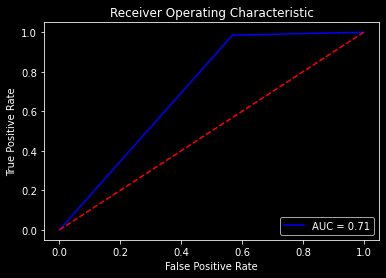

In [49]:
buildROC(y_test, y_pred)

In [50]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler

In [51]:
#LR using using random undersampling

In [52]:
rus=RandomUnderSampler(random_state=42)
X_rus,y_rus=rus.fit_resample(X,y)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.3, random_state=0)

In [54]:
LR=LogisticRegression()
LR.fit(X_train,y_train)
y_pred=LR.predict(X_test)

C:\Users\Aakash\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [55]:
accuracy_score(y_test,y_pred)

0.6724137931034483

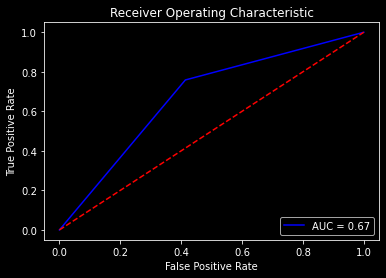

In [56]:
buildROC(y_test, y_pred)

In [57]:
#LR using random oversampling

In [58]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X, y)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.3, random_state=42)

C:\Users\Aakash\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


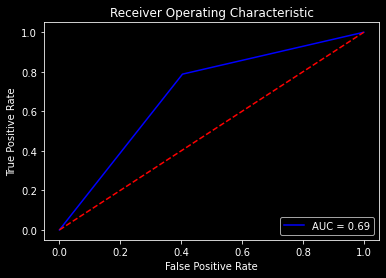

In [60]:
LR=LogisticRegression()
LR.fit(X_train,y_train)
y_pred=LR.predict(X_test)
buildROC(y_test, y_pred)


In [61]:
#lr using using smote

In [62]:
from imblearn.over_sampling import SMOTE, ADASYN
smote=SMOTE(random_state=42)
X_smote,y_smote=smote.fit_resample(X,y)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=0)

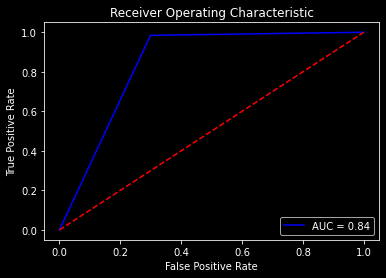

In [64]:
LR=LogisticRegression()
LR.fit(X_train,y_train)
y_pred=LR.predict(X_test)
buildROC(y_test, y_pred)


In [65]:
#LR using Adasyn

In [66]:
adasyn=ADASYN(random_state=0)
X_adasyn,y_adasyn=adasyn.fit_resample(X,y)

C:\Users\Aakash\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


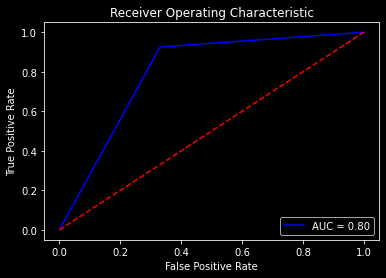

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X_adasyn, y_adasyn, test_size=0.3, random_state=0)
LR=LogisticRegression()
LR.fit(X_train,y_train)
y_pred=LR.predict(X_test)
buildROC(y_test, y_pred)


In [68]:
#Using PCA to visualise in 2D


In [69]:
from sklearn.decomposition import PCA

In [70]:
X_pca=PCA(n_components=2,random_state=42).fit_transform(X)
X_pca.size


1228

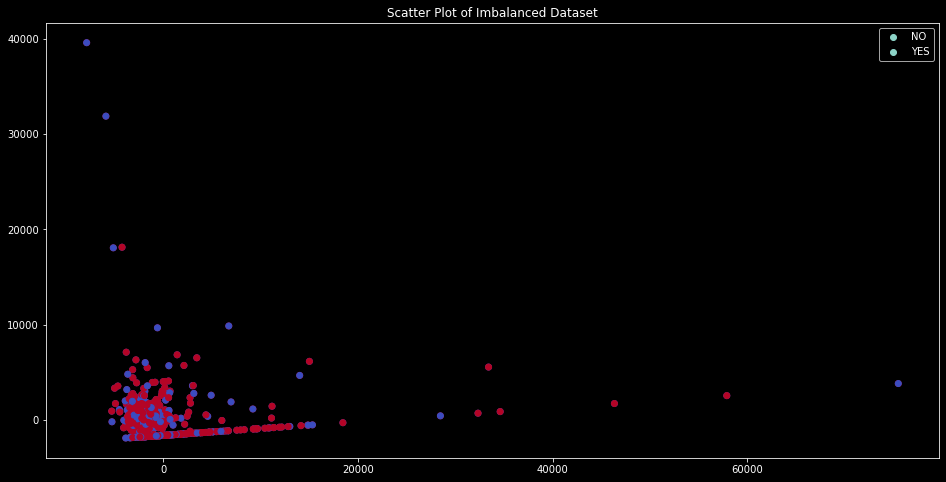

In [71]:
plt.figure(figsize=(16,8))

plt.scatter(X_pca[:,0], X_pca[:,1], c=(y == 0), label='NO', cmap='coolwarm', linewidths=1)
plt.scatter(X_pca[:,0], X_pca[:,1], c=(y == 1), label='YES', cmap='coolwarm', linewidths=1)

plt.title("Scatter Plot of Imbalanced Dataset")
plt.legend()
plt.show()

In [72]:
X_pca_adasyn=PCA(n_components=2,random_state=42).fit_transform(X_adasyn)


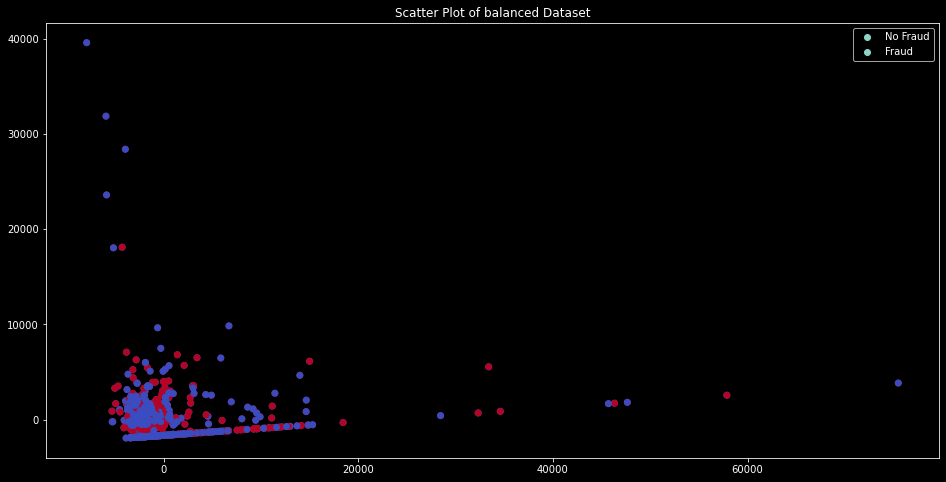

In [73]:
plt.figure(figsize=(16,8))

plt.scatter(X_pca_adasyn[:,0], X_pca_adasyn[:,1], c=(y_adasyn == 0), label='No Fraud', cmap='coolwarm', linewidths=1)
plt.scatter(X_pca_adasyn[:,0], X_pca_adasyn[:,1], c=(y_adasyn == 1), label='Fraud', cmap='coolwarm', linewidths=1)

plt.title("Scatter Plot of balanced Dataset")
plt.legend()
plt.show()

In [74]:
#train test splits for all datasets

In [75]:
rus = RandomUnderSampler(random_state=42)
X_under, y_under = rus.fit_resample(X, y)
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under, y_under, test_size=0.3, random_state=0)

In [76]:
ros = RandomOverSampler(random_state=42)
X_over, y_over = ros.fit_resample(X, y)
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over, y_over, test_size=0.3, random_state=0)

In [77]:
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.3, random_state=0)

In [78]:
adasyn = ADASYN(random_state=42)
X_adasyn, y_adasyn = adasyn.fit_resample(X, y)
X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn = train_test_split(X_adasyn, y_adasyn, test_size=0.3, random_state=0)

In [79]:
from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [80]:
#CREATING A LIST OF MODELS WITH THEIR ACCURACY, RECALL AND F1 SCORES
names_lst = []
aucs_lst = []
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []


In [81]:

def build_measure_model(models):
    plt.figure(figsize=(12,6))
    
    #TRAINING MODEL, PREDICTING AND GENERATING SCORES FOR ALL MODELS IN THE LIST
    for name, model,Xdata,ydata in models:
        
        names_lst.append(name)
        
        X_train, X_test, y_train, y_test = train_test_split(Xdata, ydata, test_size=0.3, random_state=0)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
         # calculate accuracy
        Accuracy = metrics.accuracy_score(y_pred , y_test)
        accuracy_lst.append(Accuracy)

        # calculate auc
        Aucs = metrics.roc_auc_score(y_test , y_pred)
        aucs_lst.append(Aucs)

        # calculate precision
        PrecisionScore = metrics.precision_score(y_test , y_pred)
        precision_lst.append(PrecisionScore)

        # calculate recall
        RecallScore = metrics.recall_score(y_test , y_pred)
        recall_lst.append(RecallScore)

        # calculate f1 score
        F1Score = metrics.f1_score(y_test , y_pred)
        f1_lst.append(F1Score)
        
        cnf_matrix = metrics.confusion_matrix(y_test , y_pred)
        
        print("Model Name :", name)
        print('Accuracy :{0:0.5f}'.format(Accuracy)) 
        print('AUC : {0:0.5f}'.format(Aucs))
        print('Precision : {0:0.5f}'.format(PrecisionScore))
        print('Recall : {0:0.5f}'.format(RecallScore))
        print('F1 : {0:0.5f}'.format(F1Score))
        print('Confusion Matrix : \n', cnf_matrix)
        print("\n")
        
        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
        auc = metrics.roc_auc_score(y_test, y_pred)
        plt.plot(fpr,tpr,linewidth=2, label=name + ", auc="+str(auc))
        
        
    plt.legend(loc=4)
    plt.plot([0,1], [0,1], 'k--' )
    plt.rcParams['font.size'] = 12
    plt.title('ROC curve for Predicting Loan Eligibility')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.show()

In [82]:
#LR for all data

Model Name : LR imbalance
Accuracy :0.83243
AUC : 0.70822
Precision : 0.81988
Recall : 0.98507
F1 : 0.89492
Confusion Matrix : 
 [[ 22  29]
 [  2 132]]


Model Name : LR Undersampling
Accuracy :0.68103
AUC : 0.68103
Precision : 0.65217
Recall : 0.77586
F1 : 0.70866
Confusion Matrix : 
 [[34 24]
 [13 45]]


Model Name : LR Oversampling
Accuracy :0.72047
AUC : 0.72047
Precision : 0.66471
Recall : 0.88976
F1 : 0.76094
Confusion Matrix : 
 [[ 70  57]
 [ 14 113]]


Model Name : LR SMOTE
Accuracy :0.83858
AUC : 0.83858
Precision : 0.76220
Recall : 0.98425
F1 : 0.85911
Confusion Matrix : 
 [[ 88  39]
 [  2 125]]


Model Name : LR ADASYN
Accuracy :0.82143
AUC : 0.81286
Precision : 0.76970
Recall : 0.94776
F1 : 0.84950
Confusion Matrix : 
 [[ 80  38]
 [  7 127]]




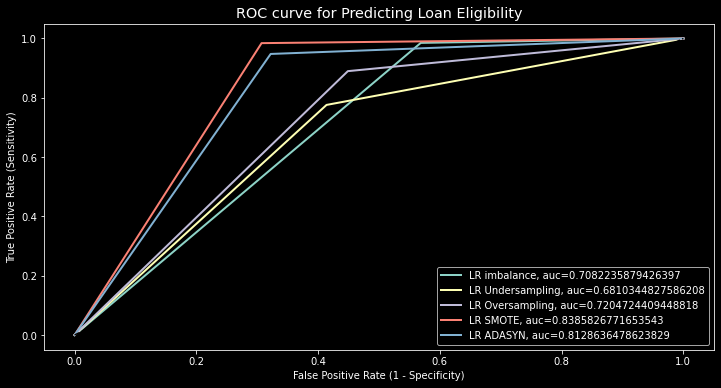

In [83]:
LRmodels = []

LRmodels.append(('LR imbalance', LogisticRegression(solver='liblinear', multi_class='ovr'),X,y))
LRmodels.append(('LR Undersampling', LogisticRegression(solver='liblinear', multi_class='ovr'),X_under,y_under))
LRmodels.append(('LR Oversampling', LogisticRegression(solver='liblinear', multi_class='ovr'),X_over,y_over))
LRmodels.append(('LR SMOTE', LogisticRegression(solver='liblinear', multi_class='ovr'),X_smote,y_smote))
LRmodels.append(('LR ADASYN', LogisticRegression(solver='liblinear', multi_class='ovr'),X_adasyn,y_adasyn))

# Call function to create model and measure its performance
build_measure_model(LRmodels)

In [84]:
#RF for all data

Model Name : RF imbalance
Accuracy :0.79459
AUC : 0.68818
Precision : 0.81579
Recall : 0.92537
F1 : 0.86713
Confusion Matrix : 
 [[ 23  28]
 [ 10 124]]


Model Name : RF Undersampling
Accuracy :0.72414
AUC : 0.72414
Precision : 0.70968
Recall : 0.75862
F1 : 0.73333
Confusion Matrix : 
 [[40 18]
 [14 44]]


Model Name : RF Oversampling
Accuracy :0.86220
AUC : 0.86220
Precision : 0.84328
Recall : 0.88976
F1 : 0.86590
Confusion Matrix : 
 [[106  21]
 [ 14 113]]


Model Name : RF SMOTE
Accuracy :0.83858
AUC : 0.83858
Precision : 0.79452
Recall : 0.91339
F1 : 0.84982
Confusion Matrix : 
 [[ 97  30]
 [ 11 116]]


Model Name : RF ADASYN
Accuracy :0.81746
AUC : 0.80964
Precision : 0.77160
Recall : 0.93284
F1 : 0.84459
Confusion Matrix : 
 [[ 81  37]
 [  9 125]]




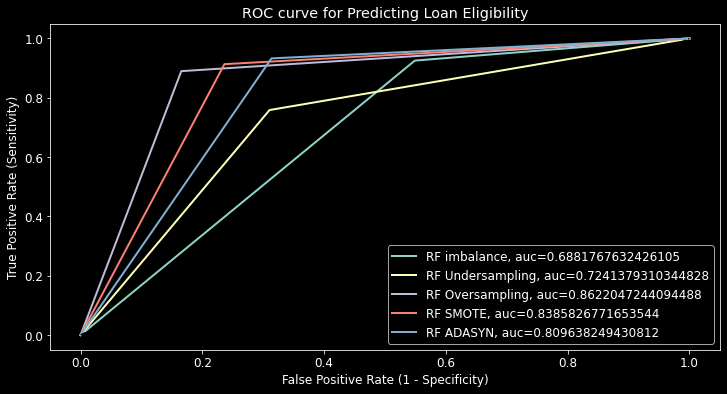

In [85]:
RFmodels = []

RFmodels.append(('RF imbalance', RandomForestClassifier(),X,y))
RFmodels.append(('RF Undersampling', RandomForestClassifier(),X_under,y_under))
RFmodels.append(('RF Oversampling', RandomForestClassifier(),X_over,y_over))
RFmodels.append(('RF SMOTE', RandomForestClassifier(),X_smote,y_smote))
RFmodels.append(('RF ADASYN', RandomForestClassifier(),X_adasyn,y_adasyn))

# Call function to create model and measure its performance
build_measure_model(RFmodels)

In [86]:
#decision Tree

Model Name : DT imbalance
Accuracy :0.75135
AUC : 0.68262
Precision : 0.82353
Recall : 0.83582
F1 : 0.82963
Confusion Matrix : 
 [[ 27  24]
 [ 22 112]]


Model Name : DT Undersampling
Accuracy :0.74138
AUC : 0.74138
Precision : 0.73333
Recall : 0.75862
F1 : 0.74576
Confusion Matrix : 
 [[42 16]
 [14 44]]


Model Name : DT Oversampling
Accuracy :0.81890
AUC : 0.81890
Precision : 0.85217
Recall : 0.77165
F1 : 0.80992
Confusion Matrix : 
 [[110  17]
 [ 29  98]]


Model Name : DT SMOTE
Accuracy :0.76772
AUC : 0.76772
Precision : 0.78814
Recall : 0.73228
F1 : 0.75918
Confusion Matrix : 
 [[102  25]
 [ 34  93]]


Model Name : DT ADASYN
Accuracy :0.76190
AUC : 0.75993
Precision : 0.76812
Recall : 0.79104
F1 : 0.77941
Confusion Matrix : 
 [[ 86  32]
 [ 28 106]]




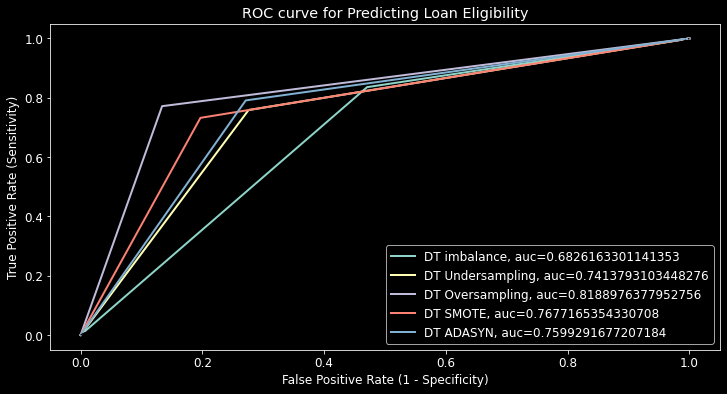

In [87]:
DTmodels = []

dt = DecisionTreeClassifier()

DTmodels.append(('DT imbalance', dt,X,y))
DTmodels.append(('DT Undersampling', dt,X_under,y_under))
DTmodels.append(('DT Oversampling', dt,X_over,y_over))
DTmodels.append(('DT SMOTE', dt,X_smote,y_smote))
DTmodels.append(('DT ADASYN', dt,X_adasyn,y_adasyn))

# Call function to create model and measure its performance
build_measure_model(DTmodels)

In [88]:
#naive Bayes

Model Name : NB imbalance
Accuracy :0.82162
AUC : 0.70076
Precision : 0.81761
Recall : 0.97015
F1 : 0.88737
Confusion Matrix : 
 [[ 22  29]
 [  4 130]]


Model Name : NB Undersampling
Accuracy :0.72414
AUC : 0.72414
Precision : 0.66250
Recall : 0.91379
F1 : 0.76812
Confusion Matrix : 
 [[31 27]
 [ 5 53]]


Model Name : NB Oversampling
Accuracy :0.68110
AUC : 0.68110
Precision : 0.62500
Recall : 0.90551
F1 : 0.73955
Confusion Matrix : 
 [[ 58  69]
 [ 12 115]]


Model Name : NB SMOTE
Accuracy :0.80709
AUC : 0.80709
Precision : 0.74684
Recall : 0.92913
F1 : 0.82807
Confusion Matrix : 
 [[ 87  40]
 [  9 118]]


Model Name : NB ADASYN
Accuracy :0.75397
AUC : 0.74387
Precision : 0.71176
Recall : 0.90299
F1 : 0.79605
Confusion Matrix : 
 [[ 69  49]
 [ 13 121]]




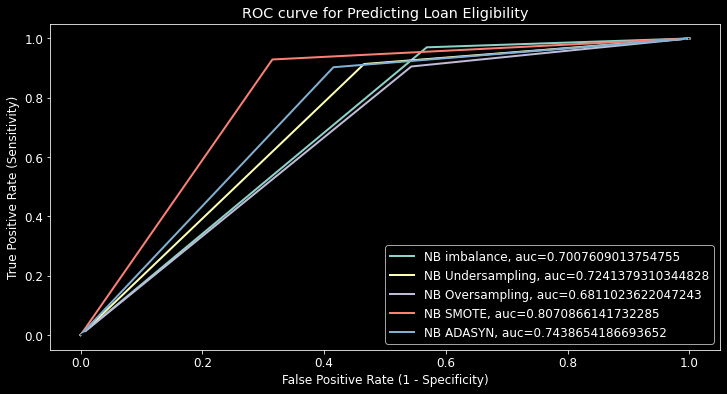

In [89]:
NBmodels = []

NBmodels.append(('NB imbalance', GaussianNB(),X,y))
NBmodels.append(('NB Undersampling', GaussianNB(),X_under,y_under))
NBmodels.append(('NB Oversampling', GaussianNB(),X_over,y_over))
NBmodels.append(('NB SMOTE', GaussianNB(),X_smote,y_smote))
NBmodels.append(('NB ADASYN', GaussianNB(),X_adasyn,y_adasyn))

# Call function to create model and measure its performance
build_measure_model(NBmodels)

In [90]:
#comparing all models

In [91]:
data = {'Model':names_lst,
       'Accuracy':accuracy_lst,
       'AUC':aucs_lst,
       'PrecisionScore':precision_lst,
       'RecallScore':recall_lst,
       'F1Score':f1_lst}

print("Performance measures of various classifiers: \n")
performance_df = pd.DataFrame(data) 
performance_df.sort_values(['AUC','RecallScore','F1Score'],ascending=False)

Performance measures of various classifiers: 



,Model,Accuracy,AUC,PrecisionScore,RecallScore,F1Score
7,RF Oversampling,0.862205,0.862205,0.843284,0.889764,0.865900
8,RF SMOTE,0.838583,0.838583,0.794521,0.913386,0.849817
3,LR SMOTE,0.838583,0.838583,0.762195,0.984252,0.859107
12,DT Oversampling,0.818898,0.818898,0.852174,0.771654,0.809917
4,LR ADASYN,0.821429,0.812864,0.769697,0.947761,0.849498
9,RF ADASYN,0.817460,0.809638,0.771605,0.932836,0.844595
18,NB SMOTE,0.807087,0.807087,0.746835,0.929134,0.828070
13,DT SMOTE,0.767717,0.767717,0.788136,0.732283,0.759184
14,DT ADASYN,0.761905,0.759929,0.768116,0.791045,0.779412
19,NB ADASYN,0.753968,0.743865,0.711765,0.902985,0.796053


In [92]:
#using grid search

In [93]:
from sklearn.model_selection import GridSearchCV

In [139]:
log_reg_params = {"solver": ['saga'],
                  "penalty": ['l1', 'l2'], 
                  'C':  [0.01, 0.1, 1, 10, 100], 
                  "max_iter" : [100000]},

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)

grid_log_reg.fit(X_smote,y_smote)

#best estimator
print("Logistic Regression best estimator : \n",grid_log_reg.best_estimator_)
#predict
y_pred_lr = grid_log_reg.predict(X_test_under)
#print score
print('\nLogistic Regression f1 Score : {0:0.5f}'.format(metrics.f1_score(y_test_under , y_pred_lr)))

Logistic Regression best estimator : 
 LogisticRegression(C=0.01, max_iter=100000, penalty='l1', solver='saga')

Logistic Regression f1 Score : 0.52632


In [95]:
#knn
knears_params = {"n_neighbors": list(range(2,60,1)), 
                 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)

grid_knears.fit(X_train_under,y_train_under)

# KNears best estimator
print("KNN best estimator : \n",grid_knears.best_estimator_)

# predict test dataset
y_pred_knn = grid_knears.predict(X_test_under)

# f1 score
print('\nKNN f1 Score : {0:0.5f}'.format(metrics.f1_score(y_test_under , y_pred_knn)))

KNN best estimator : 
 KNeighborsClassifier()

KNN f1 Score : 0.65185


In [96]:
#dt
tree_params = {"criterion": ["gini", "entropy"], 
               "max_depth": list(range(2,4,1)), 
               "min_samples_leaf": list(range(5,7,1))}

grid_tree = GridSearchCV(estimator = DecisionTreeClassifier(),
                        param_grid = tree_params,
                        scoring = 'accuracy', 
                        cv = 5, 
                        verbose = 1,
                        n_jobs = -1)


grid_tree.fit(X_train_under,y_train_under)

# tree best estimator
print("Decision Tree best estimator : \n",grid_tree.best_estimator_)

# predict test dataset
y_pred_dt = grid_tree.predict(X_test_under)


# f1 score
print('\nf1 Score : {0:0.5f}'.format(metrics.f1_score(y_test_under , y_pred_dt)))

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Decision Tree best estimator : 
 DecisionTreeClassifier(max_depth=2, min_samples_leaf=6)

f1 Score : 0.73381


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    2.3s finished


In [97]:
X=pd.get_dummies(X)
df=pd.get_dummies(df)
df1=pd.get_dummies(df1)

In [98]:
#RF on smote had the best performance

In [140]:
model=LogisticRegression(C=0.011, max_iter=100000, penalty='l1', solver='saga')

In [141]:
model.fit(X_smote,y_smote)

LogisticRegression(C=0.011, max_iter=100000, penalty='l1', solver='saga')

In [142]:
df1

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
1,3076,1500,126.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
2,5000,1800,208.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
3,2340,2546,100.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
4,3276,0,78.0,360.0,1.0,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,4009,1777,113.0,360.0,1.0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1
363,4158,709,115.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
364,3250,1993,126.0,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0
365,5000,2393,158.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0


In [143]:
pred_test=model.predict(df1)

In [144]:
submission=pd.read_csv("C:\\Users\\Aakash\\Desktop\\loan\\sample_submission_49d68Cx.csv")

In [145]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=data2['Loan_ID']

In [146]:
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,N
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,N


In [147]:
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('logistic4.csv')

'C:\\Users\\Aakash'